## Notes

### Initial Data Gather Strategy
- Take Data from a single Line at this point 6 for now
- Take from dates: 7/1/2018-10/1/2018
- Obtain a dataset with Station Info that contains the Borough (Manhattan, etc)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Turnstile_Usage_Data__2018.csv')

In [7]:
#statinfo = pd.read_csv('Station Info.csv')

### Exploration

In [10]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,R232A,R176,03-06-00,33 ST,6,IRT,12/23/2017,20:00:00,REGULAR,102417472,68072550
1,R409,R449,01-00-02,E 149 ST,6,IRT,12/23/2017,08:00:00,REGULAR,1985376,6042304
2,R256,R182,00-00-02,116 ST,6,IRT,12/23/2017,04:00:00,REGULAR,765700,471312
3,R246,R177,00-03-02,68ST-HUNTER CO,6,IRT,12/23/2017,20:00:00,REGULAR,14882041,10581878
4,R227,R131,00-00-05,23 ST,6,IRT,12/23/2017,08:00:00,REGULAR,1524615,537740


In [9]:
#See what the unique stations are on the 6 Line
df['Station'].unique()

array(['33 ST', 'E 149 ST', '116 ST', '68ST-HUNTER CO', '23 ST',
       'CYPRESS AV', '77 ST', 'HUNTS POINT AV', 'WESTCHESTER SQ', '51 ST',
       'MIDDLETOWN RD', 'BUHRE AV', 'WHITLOCK AV', 'BROOK AV',
       'CASTLE HILL AV', 'PARKCHESTER', 'PELHAM BAY PARK',
       'MORISN AV/SNDVW', 'ASTOR PL', 'SPRING ST', '96 ST', '28 ST',
       'ZEREGA AV', 'LONGWOOD AV', "E 143/ST MARY'S", '3 AV 138 ST',
       '103 ST', '110 ST', 'ST LAWRENCE AV', 'ELDER AV', 'ORCHARD BEACH'],
      dtype=object)

In [24]:
df.info() #No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585121 entries, 0 to 585120
Data columns (total 11 columns):
 #   Column                                                      Non-Null Count   Dtype         
---  ------                                                      --------------   -----         
 0   C/A                                                         585121 non-null  object        
 1   Unit                                                        585121 non-null  object        
 2   SCP                                                         585121 non-null  object        
 3   Station                                                     585121 non-null  object        
 4   Line Name                                                   585121 non-null  int64         
 5   Division                                                    585121 non-null  object        
 6   Date                                                        585121 non-null  datetime64[ns]
 7   Time       

### Question 2: Convert the Date column into a Datetype

In [13]:
#Since Date is a string, need to convert to a DateTime
type(df['Date'][0])

str

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Question 3: Group daily entries for each turnstyle, Unit and Station

In [19]:
daily_entries = df.groupby(['C/A', 'Unit', 'SCP', 'Station']).sum().reset_index()

In [21]:
daily_entries.sample(10)

,C/A,Unit,SCP,Station,Line Name,Entries,Exits
271,R422,R428,00-03-01,BUHRE AV,12876,2536534161,505217043
53,R228,R143,00-00-05,28 ST,7152,7852725537,5755884239
18,R220,R160,01-00-01,ASTOR PL,12876,1195503691,2166381434
32,R226A,R131,03-05-01,23 ST,12852,4284,2203614
220,R414,R162,00-05-00,ELDER AV,13002,568254224,284033024
2,OB01,R459,00-00-02,ORCHARD BEACH,4140,797454,86006
112,R246,R177,00-00-02,68ST-HUNTER CO,12906,636278428,349485767
127,R247,R178,01-00-03,77 ST,12930,1237786292,3436427650
146,R252,R180,00-00-01,103 ST,13026,7785636104,3090581731
113,R246,R177,00-00-03,68ST-HUNTER CO,12930,12636083276,7788307040


### Question 4: Using a single turnstyle, plot the the entries by day

In [62]:
astor_pl_entries= df[(df['Unit']=='R160') &\
                  (df['C/A']== 'R220') &\
                  (df['Station']=='ASTOR PL')]
astor_pl_entries.head(10)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
59,R220,R160,01-03-02,ASTOR PL,6,IRT,2017-12-23,20:00:00,REGULAR,2877803,8987441
66,R220,R160,01-03-01,ASTOR PL,6,IRT,2017-12-23,00:00:00,REGULAR,1697011,4509817
105,R220,R160,01-00-02,ASTOR PL,6,IRT,2017-12-23,08:00:00,REGULAR,1228906,3234597
128,R220,R160,01-03-01,ASTOR PL,6,IRT,2017-12-23,04:00:00,REGULAR,1697058,4509862
195,R220,R160,01-00-02,ASTOR PL,6,IRT,2017-12-23,00:00:00,REGULAR,1228879,3234576
221,R220,R160,01-00-01,ASTOR PL,6,IRT,2017-12-23,20:00:00,REGULAR,495137,895050
268,R220,R160,01-03-01,ASTOR PL,6,IRT,2017-12-23,08:00:00,REGULAR,1697070,4509902
318,R220,R160,01-03-00,ASTOR PL,6,IRT,2017-12-23,12:00:00,REGULAR,1115808,4111430
358,R220,R160,01-03-00,ASTOR PL,6,IRT,2017-12-23,08:00:00,REGULAR,1115794,4111291
373,R220,R160,01-00-02,ASTOR PL,6,IRT,2017-12-23,12:00:00,REGULAR,1228929,3234667


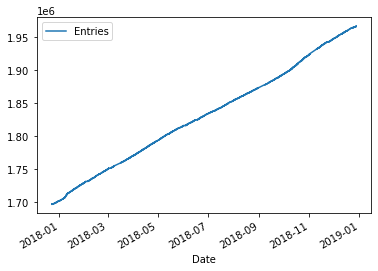

In [63]:
astor_pl_entries[astor_pl_entries['SCP']=='01-03-01'].plot('Date', 'Entries')

### Question 5: Look at all the turnstyles (SCP's).  Sum the counts for each turnstyle

In [66]:
# Look at how many turnstyles there are
print(astor_pl_entries['SCP'].unique())
print('Unique Turnstyles:', astor_pl_entries['SCP'].nunique())

['01-03-02' '01-03-01' '01-00-02' '01-00-01' '01-03-00' '01-00-00']
Unique Turnstyles: 6


In [68]:
#Group by turnstyles and the get hte sum for each.  
  
astor_pl_entries.groupby('SCP').sum()

,Line Name,Entries,Exits
SCP,,,
01-00-00,12876,2004387876,6252287991
01-00-01,12876,1195503691,2166381434
01-00-02,12858,2772607423,7210789299
01-03-00,11676,1008592300,3736154651
01-03-01,12882,3932756767,10595034373
01-03-02,12882,6668229002,20739870397


#### Obviously something is messed up since that is way too many entries.  I'm going to see what the data looks like for the entire DF at time = 0 which is 01-01-2018

In [72]:
df_jan = df[df['Date']>= '1/1/2018']
df_jan.sample(10)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
428984,R410,R450,00-00-02,LONGWOOD AV,6,IRT,2018-09-20,09:00:00,REGULAR,4024067,2470914
23420,R230,R143,02-06-02,28 ST,6,IRT,2018-01-05,12:00:00,REGULAR,1734206,3135305
162610,R231,R176,00-00-02,33 ST,6,IRT,2018-04-05,09:00:00,REGULAR,11927515,5567898
232007,R417,R222,00-03-01,PARKCHESTER,6,IRT,2018-05-17,13:00:00,REGULAR,1066131,5607165
215285,R417,R222,00-00-03,PARKCHESTER,6,IRT,2018-05-07,09:00:00,REGULAR,1020821,711862
59931,R242,R049,01-00-02,51 ST,6,IRT,2018-01-27,07:00:00,REGULAR,557565,401504
487282,R417,R222,00-00-00,PARKCHESTER,6,IRT,2018-10-27,13:00:00,REGULAR,9668672,527479
367923,R253,R181,00-00-02,110 ST,6,IRT,2018-08-06,12:00:00,REGULAR,5191154,11884058
384926,R256,R182,00-00-01,116 ST,6,IRT,2018-08-17,01:00:00,REGULAR,2077984,779713
412785,R242,R049,01-03-00,51 ST,6,IRT,2018-09-10,16:00:00,REGULAR,3906677,2949919


In [76]:
test= df[(df['Unit']=='R160') &\
        (df['C/A']== 'R220') &\
        (df['Station']=='ASTOR PL') &\
        (df['SCP']=='01-00-01')]

In [78]:
test.head(30)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
221,R220,R160,01-00-01,ASTOR PL,6,IRT,2017-12-23,20:00:00,REGULAR,495137,895050
670,R220,R160,01-00-01,ASTOR PL,6,IRT,2017-12-23,04:00:00,REGULAR,494915,894762
712,R220,R160,01-00-01,ASTOR PL,6,IRT,2017-12-23,12:00:00,REGULAR,494960,894851
730,R220,R160,01-00-01,ASTOR PL,6,IRT,2017-12-23,00:00:00,REGULAR,494900,894754
1479,R220,R160,01-00-01,ASTOR PL,6,IRT,2017-12-23,08:00:00,REGULAR,494918,894774
1608,R220,R160,01-00-01,ASTOR PL,6,IRT,2017-12-23,16:00:00,REGULAR,495040,894951
2337,R220,R160,01-00-01,ASTOR PL,6,IRT,2017-12-24,00:00:00,REGULAR,495190,895103
2791,R220,R160,01-00-01,ASTOR PL,6,IRT,2017-12-24,16:00:00,REGULAR,495307,895220
2902,R220,R160,01-00-01,ASTOR PL,6,IRT,2017-12-24,08:00:00,REGULAR,495214,895115
2992,R220,R160,01-00-01,ASTOR PL,6,IRT,2017-12-24,12:00:00,REGULAR,495240,895168
